These techniques are used to overcome the issues of overfitting of the models. They work by adding an extra term to the error.

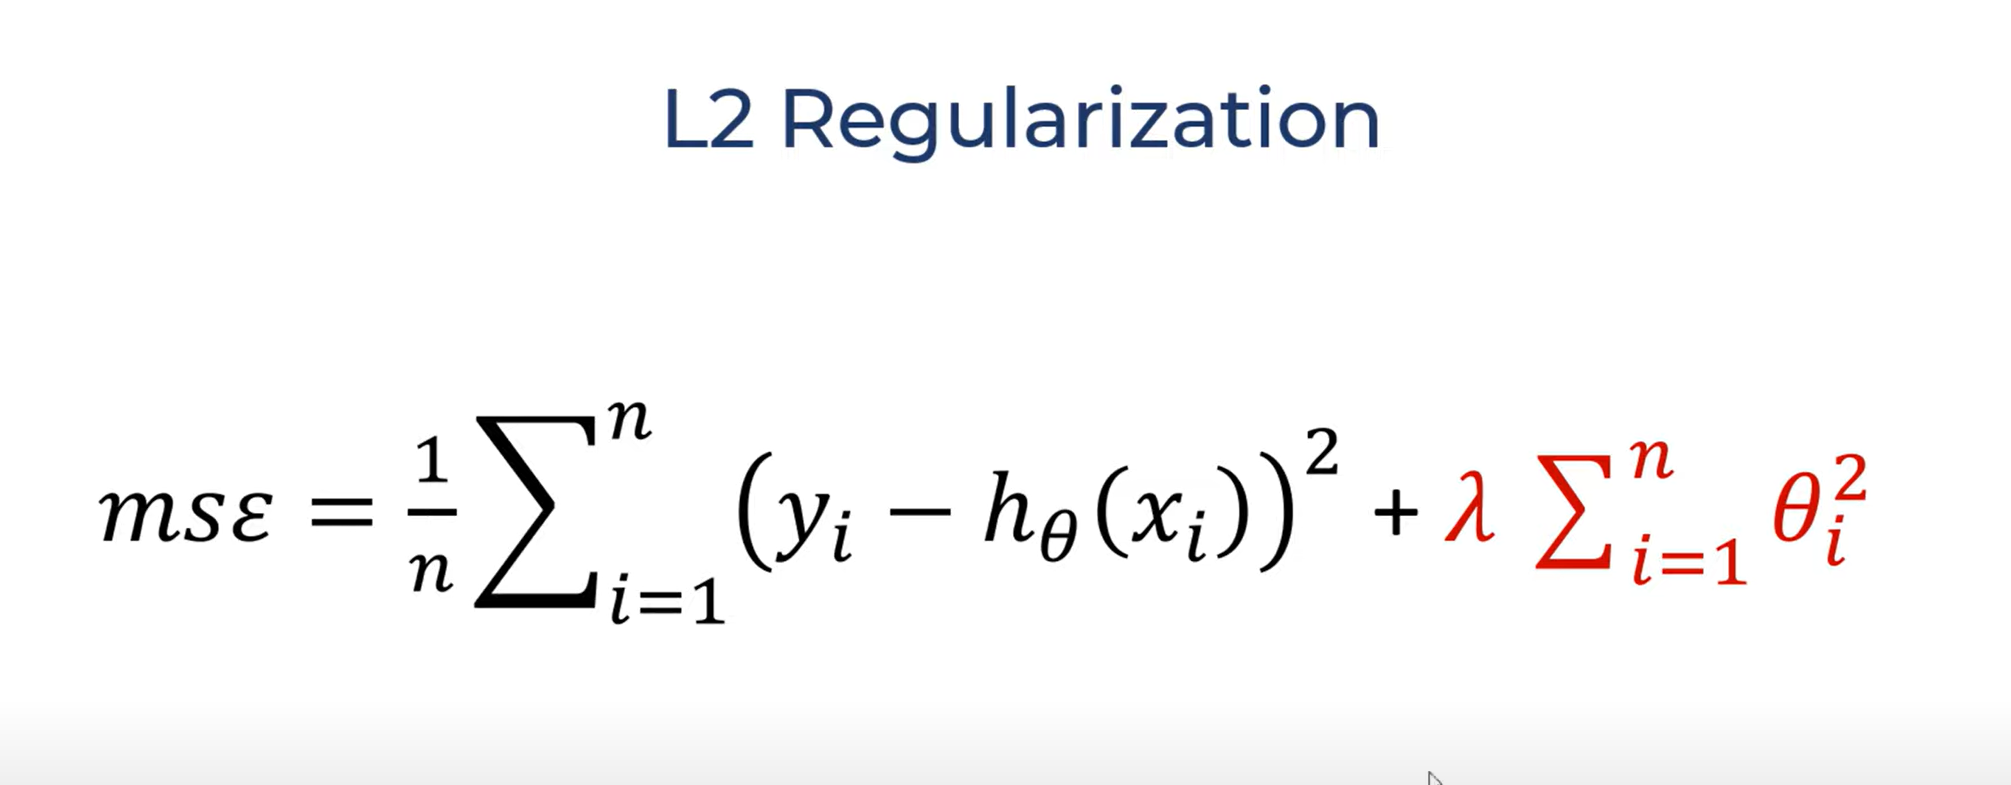
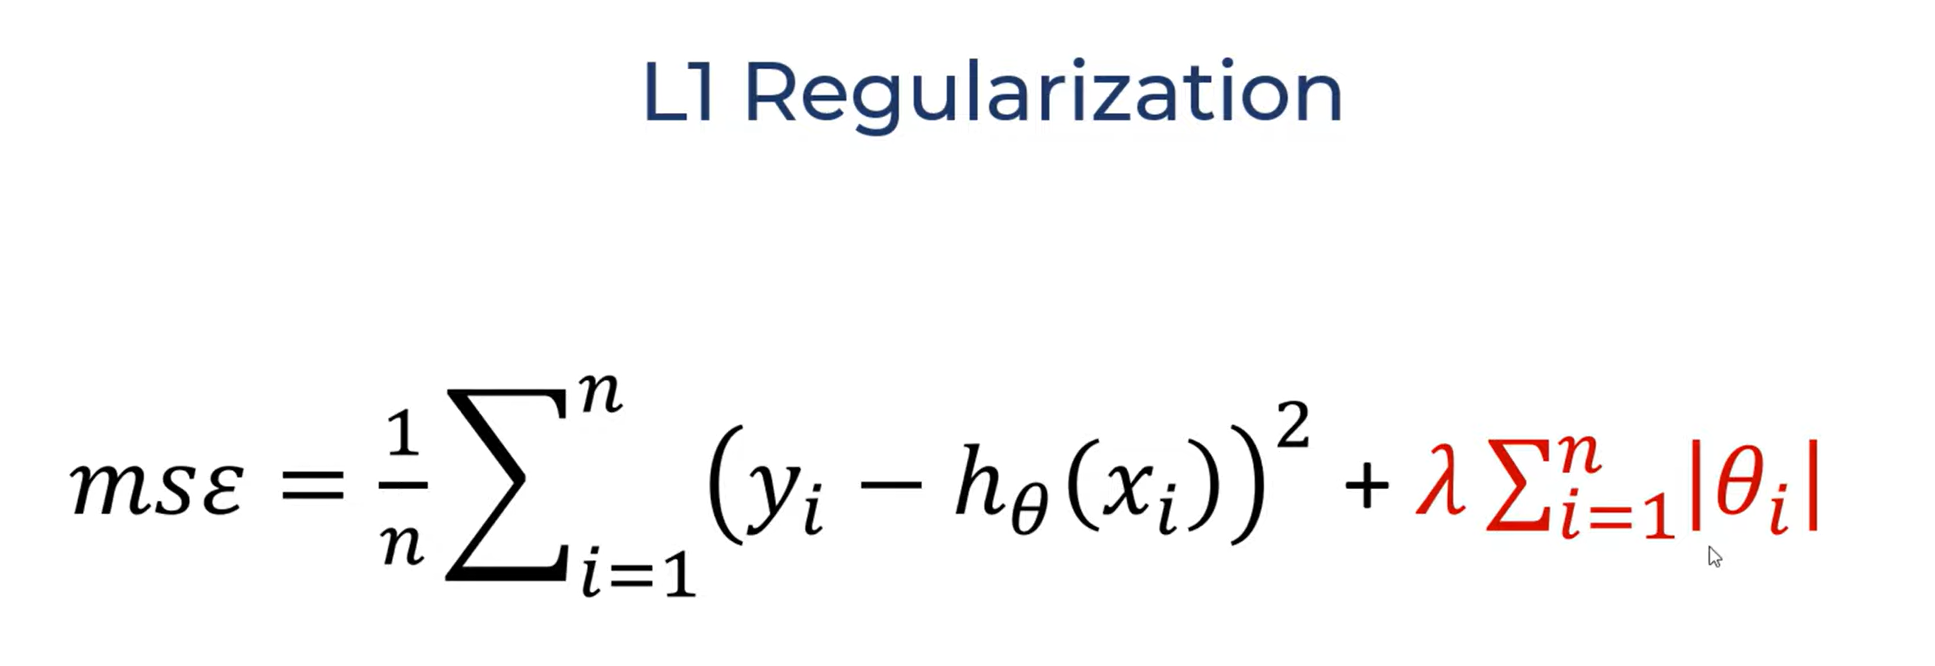

In [1]:
import pandas as pd

In [31]:
df=pd.read_csv("C:\\Users\\Sankalp Mallappa\\Downloads\\medical price\\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [32]:
df.shape

(1338, 7)

In [33]:
smoke_dummies=pd.get_dummies(df.smoker)
sex_dummies=pd.get_dummies(df.sex)
region_dummies=pd.get_dummies(df.region)

In [34]:
df=pd.concat([df,smoke_dummies],axis='columns')
df

,age,sex,bmi,children,smoker,region,charges,no,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0


In [35]:
df.rename(columns={'yes':'Smoker'},inplace=True)
df.drop(columns=['no','smoker'],axis='columns',inplace=True)
df

,age,sex,bmi,children,region,charges,Smoker
0,19,female,27.900,0,southwest,16884.92400,1
1,18,male,33.770,1,southeast,1725.55230,0
2,28,male,33.000,3,southeast,4449.46200,0
3,33,male,22.705,0,northwest,21984.47061,0
4,32,male,28.880,0,northwest,3866.85520,0
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0
1334,18,female,31.920,0,northeast,2205.98080,0
1335,18,female,36.850,0,southeast,1629.83350,0
1336,21,female,25.800,0,southwest,2007.94500,0


In [36]:
df=pd.concat([df,sex_dummies],axis='columns')
df

,age,sex,bmi,children,region,charges,Smoker,female,male
0,19,female,27.900,0,southwest,16884.92400,1,1,0
1,18,male,33.770,1,southeast,1725.55230,0,0,1
2,28,male,33.000,3,southeast,4449.46200,0,0,1
3,33,male,22.705,0,northwest,21984.47061,0,0,1
4,32,male,28.880,0,northwest,3866.85520,0,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,northwest,10600.54830,0,0,1
1334,18,female,31.920,0,northeast,2205.98080,0,1,0
1335,18,female,36.850,0,southeast,1629.83350,0,1,0
1336,21,female,25.800,0,southwest,2007.94500,0,1,0


In [37]:
# df.rename(columns={'male':'Smoker'},inplace=True)
df.drop(columns=['sex','female'],axis='columns',inplace=True)
df

,age,bmi,children,region,charges,Smoker,male
0,19,27.900,0,southwest,16884.92400,1,0
1,18,33.770,1,southeast,1725.55230,0,1
2,28,33.000,3,southeast,4449.46200,0,1
3,33,22.705,0,northwest,21984.47061,0,1
4,32,28.880,0,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,1
1334,18,31.920,0,northeast,2205.98080,0,0
1335,18,36.850,0,southeast,1629.83350,0,0
1336,21,25.800,0,southwest,2007.94500,0,0


In [38]:
df=pd.concat([df,region_dummies],axis='columns')
df

,age,bmi,children,region,charges,Smoker,male,northeast,northwest,southeast,southwest
0,19,27.900,0,southwest,16884.92400,1,0,0,0,0,1
1,18,33.770,1,southeast,1725.55230,0,1,0,0,1,0
2,28,33.000,3,southeast,4449.46200,0,1,0,0,1,0
3,33,22.705,0,northwest,21984.47061,0,1,0,1,0,0
4,32,28.880,0,northwest,3866.85520,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,northwest,10600.54830,0,1,0,1,0,0
1334,18,31.920,0,northeast,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,southeast,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,southwest,2007.94500,0,0,0,0,0,1


In [39]:
df.drop(columns=['region','southwest'],inplace=True)
df

,age,bmi,children,charges,Smoker,male,northeast,northwest,southeast
0,19,27.900,0,16884.92400,1,0,0,0,0
1,18,33.770,1,1725.55230,0,1,0,0,1
2,28,33.000,3,4449.46200,0,1,0,0,1
3,33,22.705,0,21984.47061,0,1,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,1,0
1334,18,31.920,0,2205.98080,0,0,1,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1
1336,21,25.800,0,2007.94500,0,0,0,0,0


In [40]:
df.isna().sum()

age          0
bmi          0
children     0
charges      0
Smoker       0
male         0
northeast    0
northwest    0
southeast    0
dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=['charges']),df.charges,test_size=0.2,random_state=10)

In [50]:
from sklearn.linear_model import LinearRegression
Lr=LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression()

In [51]:
Lr.score(x_test,y_test)

0.6953286838318307

In [52]:
Lr.score(x_train,y_train)

0.7636624681782707

In [69]:
from sklearn import linear_model
laso=linear_model.Lasso(alpha=0.1,max_iter=1000,tol=0.1)
laso.fit(x_train,y_train)

Lasso(alpha=0.1, tol=0.1)

In [70]:
laso.score(x_test,y_test)

0.6953475691295252

In [71]:
laso.score(x_train,y_train)

0.7636624404315824

In [72]:
from sklearn import linear_model
rid=linear_model.Ridge(alpha=0.1,max_iter=1000,tol=0.1)
rid.fit(x_train,y_train)

Ridge(alpha=0.1, max_iter=1000, tol=0.1)

In [74]:
rid.score(x_test,y_test)

0.6953729473150245

In [75]:
rid.score(x_train,y_train)

0.7636622521927022